## Exercise 3:


In [95]:
id1 = "314096637"
id2 = "318879533"

name_student_1 = "Ziv, Kelmer"
name_student_2 = "Noa, Nesher"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
# df = pd.DataFrame([id1])df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)

url = "https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv"
data = pd.read_csv(url)
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [96]:
Maxviews = data[data["views"] == data.views.max()]
MaxViews = Maxviews.groupby('title')[['publish_time','views']].max()
MaxViews

,publish_time,views
title,,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,2017-12-06T17:58:51.000Z,149376127


In [97]:
Channel_title = data.groupby('channel_title')[['views']].sum()
TopChannel = pd.DataFrame(Channel_title['views'].nlargest(3))
TopChannel

,views
channel_title,
YouTube Spotlight,783298628
Marvel Entertainment,679590872
LuisFonsiVEVO,534738794


In [98]:
CorrSpearman = data[['likes', 'dislikes','views','comment_count']].corr(method = 'spearman')
CorrSpearman

,likes,dislikes,views,comment_count
likes,1.000000,0.801154,0.877789,0.881849
dislikes,0.801154,1.000000,0.866979,0.843331
views,0.877789,0.866979,1.000000,0.840532
comment_count,0.881849,0.843331,0.840532,1.000000


<AxesSubplot:>

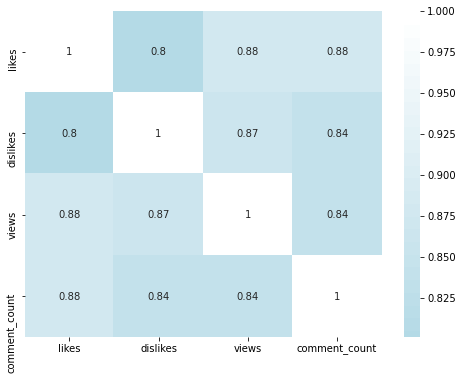

In [99]:
plt.figure(figsize=(8,6))  
sns.heatmap(CorrSpearman, cmap='ocean', center=0, annot = True)

<AxesSubplot:xlabel='likes', ylabel='comment_count'>

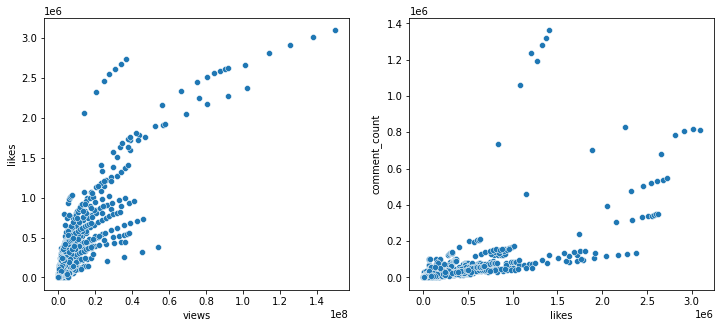

In [100]:
fig,axis = plt.subplots(1,2,figsize = (12,5))
up_correr = CorrSpearman.unstack().sort_values()[-7:-5]
upper = pd.Series.keys(up_correr)
sns.scatterplot(ax = axis[0], data = data, x = upper[0][0], y = upper[0][1])
sns.scatterplot(ax = axis[1], data = data, x = upper[1][0], y = upper[1][1])

In [101]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['year'] = pd.DatetimeIndex(data['publish_time']).year
maxby = data[(data.year == 2017)| (data.year == 2018)]
maxby.pivot_table('views',index='category_id', columns='year',margins=True , aggfunc='sum')

year,2017,2018,All
category_id,,,
1,8.654615e+08,1.440729e+08,1009534450
2,7.885352e+07,8.047346e+06,86900867
10,4.504741e+09,8.398109e+08,5344552275
15,1.442459e+08,3.262926e+07,176875195
17,3.812432e+08,6.166033e+07,442903515
19,5.429144e+07,7.583452e+06,61874890
20,5.035442e+07,8.417667e+07,134531087
22,7.018258e+08,6.784943e+07,769675204
23,1.130782e+09,1.971474e+08,1327929119
